<a href="https://colab.research.google.com/github/tejrays/Redis/blob/master/ML_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



We are multiplying:

$$
A \ (n \times k) \times B \ (k \times m) \rightarrow C \ (n \times m)
$$

---

**1. Size of the result**  
The result \( C \) has \( n \) rows and \( m \) columns.  
So \( C \) has \( n \times m \) entries.

---

**2. Work for each entry**  
Each element \( C_{ij} \) is computed as:

$$
C_{ij} = \sum_{t=1}^k A_{it} \cdot B_{tj}
$$

That means:
- \( k \) multiplications (one for each term \( A_{it} \cdot B_{tj} \))
- \( k - 1 \) additions to sum them together

---

**3. Total work**  
Since there are \( n \times m \) entries:

- **Multiplications:**
$$
n \times m \times k
$$

- **Additions:**
$$
n \times m \times (k - 1)
$$

---


- **Multiplications:** \( nmk \)  
- **Additions:** \( nm(k - 1) \)


Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import time
import numpy as np

# Matrix dimensions
n, k, m = 200, 300, 150  # Larger sizes to see timing difference

# Generate random matrices
A_list = [[np.random.rand() for _ in range(k)] for _ in range(n)]
B_list = [[np.random.rand() for _ in range(m)] for _ in range(k)]

# ------------------------------
# Method 1: Pure Python list-of-lists
# ------------------------------
start_time = time.time()

C_list = [[0 for _ in range(m)] for _ in range(n)]
for i in range(n):
    for j in range(m):
        sum_val = 0
        for t in range(k):
            sum_val += A_list[i][t] * B_list[t][j]
        C_list[i][j] = sum_val

list_time = time.time() - start_time

# ------------------------------
# Method 2: NumPy
# ------------------------------
A_np = np.array(A_list)
B_np = np.array(B_list)

start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time

# ------------------------------
# Results
# ------------------------------
print(f"List-of-lists multiplication time: {list_time:.6f} seconds")
print(f"NumPy multiplication time: {numpy_time:.6f} seconds")

# Verify results are close
print("Results match:", np.allclose(C_list, C_np))


List-of-lists multiplication time: 2.623113 seconds
NumPy multiplication time: 0.001487 seconds
Results match: True


Q3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [ ]:
import heapq
import random
import time
import numpy as np

# -------- Method 1: Repeated Max Removal (O(n^2)) --------
def median_repeated_max(arr):
    data = arr.copy()
    n = len(data)
    target_index = n // 2
    for _ in range(target_index):
        max_val = max(data)
        data.remove(max_val)
    if n % 2 == 1:
        return max(data)
    else:
        first = max(data)
        data.remove(first)
        second = max(data)
        return (first + second) / 2

# -------- Method 2: Sort and Pick (O(n log n)) --------
def median_sort(arr):
    data = sorted(arr)
    n = len(data)
    mid = n // 2
    if n % 2 == 1:
        return data[mid]
    else:
        return (data[mid - 1] + data[mid]) / 2

# -------- Method 3: Heap-based median (O(n log n)) --------
def median_heap(arr):
    lower = []  # max heap (negative values)
    upper = []  # min heap
    for num in arr:
        if not lower or num <= -lower[0]:
            heapq.heappush(lower, -num)
        else:
            heapq.heappush(upper, num)

        # Balance heaps
        if len(lower) > len(upper) + 1:
            heapq.heappush(upper, -heapq.heappop(lower))
        elif len(upper) > len(lower):
            heapq.heappush(lower, -heapq.heappop(upper))

    if len(lower) > len(upper):
        return -lower[0]
    else:
        return (-lower[0] + upper[0]) / 2

# -------- Benchmarking Function --------
def compare_median_methods(n=10000, seed=42):
    random.seed(seed)
    arr = [random.random() for _ in range(n)]
    arr_np = np.array(arr)

    # Method 1
    t0 = time.perf_counter()
    med1 = median_repeated_max(arr)
    t1 = time.perf_counter()

    # Method 2
    t2 = time.perf_counter()
    med2 = median_sort(arr)
    t3 = time.perf_counter()

    # Method 3 (heap)
    t4 = time.perf_counter()
    med3 = median_heap(arr)
    t5 = time.perf_counter()

    # NumPy
    t6 = time.perf_counter()
    med_np = np.median(arr_np)
    t7 = time.perf_counter()

    print(f"Repeated Max (O(n^2))  : {t1 - t0:.6f} s, median={med1}")
    print(f"Sort & Pick (O(n log n)): {t3 - t2:.6f} s, median={med2}")
    print(f"Heap Median (O(n log n)): {t5 - t4:.6f} s, median={med3}")
    print(f"NumPy median (Optimized): {t7 - t6:.6f} s, median={med_np}")
    print("-" * 50)

# Example
compare_median_methods(5000)


Repeated Max (O(n^2))  : 0.192505 s, median=0.5038946439920922
Sort & Pick (O(n log n)): 0.000788 s, median=0.5040029841470495
Heap Median (O(n log n)): 0.002636 s, median=0.5040029841470495
NumPy median (Optimized): 0.000373 s, median=0.5040029841470495
--------------------------------------------------


Q4.What is the gradient of the following function with respect to x and y?


We are given the function:
\[ f(x, y) = x^2 y + y^3 \sin(x) \]

{Step 1 — Partial derivative with respect to \( x \)}
\begin{align*}
\text{Derivative of } x^2 y \text{ w.r.t. } x &: \quad 2xy \quad (\text{since } y \text{ is constant}) \\
\text{Derivative of } y^3 \sin(x) \text{ w.r.t. } x &: \quad y^3 \cos(x) \\
\text{Thus:} \quad \frac{\partial f}{\partial x} &= 2xy + y^3 \cos(x)
\end{align*}

{Step 2 — Partial derivative with respect to \( y \)}
\begin{align*}
\text{Derivative of } x^2 y \text{ w.r.t. } y &: \quad x^2 \\
\text{Derivative of } y^3 \sin(x) \text{ w.r.t. } y &: \quad 3y^2 \sin(x) \\
\text{Thus:} \quad \frac{\partial f}{\partial y} &= x^2 + 3y^2 \sin(x)
\end{align*}

{Step 3 — Gradient Vector}
The gradient of \( f \), denoted \( \nabla f \), is the vector of its partial derivatives:
\[
\nabla f(x, y) = \begin{pmatrix}
\dfrac{\partial f}{\partial x} \\[8pt]
\dfrac{\partial f}{\partial y}
\end{pmatrix}
= \begin{pmatrix}
2xy + y^3 \cos(x) \\[8pt]
x^2 + 3y^2 \sin(x)
\end{pmatrix}
\]

Q5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [ ]:
import jax
import jax.numpy as jnp

# Define function
def f(vars):
    x, y = vars
    return x**2 * y + 3*x*y**2

# Analytical gradient function
def analytical_grad(x, y):
    df_dx = 2*x*y + 3*y**2
    df_dy = x**2 + 6*x*y
    return jnp.array([df_dx, df_dy])

# JAX automatic differentiation
grad_fn = jax.grad(f)

# Test for random values of x and y
key = jax.random.PRNGKey(0)
for i in range(5):
    xy = jax.random.uniform(key, shape=(2,), minval=-5.0, maxval=5.0)
    key, _ = jax.random.split(key)
    auto_grad = grad_fn(xy)
    manual_grad = analytical_grad(*xy)
    print(f"x={xy[0]:.3f}, y={xy[1]:.3f}")
    print(f"JAX grad     : {auto_grad}")
    print(f"Analytical   : {manual_grad}")
    print(f"Match? {jnp.allclose(auto_grad, manual_grad)}\n")


x=4.477, y=4.786
JAX grad     : [111.5605  148.58723]
Analytical   : [111.5605  148.58723]
Match? True

x=3.423, y=-3.176
JAX grad     : [  8.519741 -53.517868]
Analytical   : [  8.519741 -53.517868]
Match? True

x=-2.173, y=2.881
JAX grad     : [ 12.380453 -32.83761 ]
Analytical   : [ 12.380453 -32.83761 ]
Match? True

x=-4.283, y=-1.375
JAX grad     : [17.445347 53.665764]
Analytical   : [17.445347 53.665764]
Match? True

x=-4.414, y=-2.824
JAX grad     : [48.860203 94.27487 ]
Analytical   : [48.860203 94.27487 ]
Match? True



Q6.Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y', real=True)

# Example function (replace with yours)
f = x**2 * sp.sin(y) + sp.exp(x*y)

# Compute symbolic gradient
grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)

# Display analytical gradient
print("Analytical Gradient:")
print("∂f/∂x =", grad_x)
print("∂f/∂y =", grad_y)

# Convert to callable functions
grad_x_func = sp.lambdify((x, y), grad_x, "numpy")
grad_y_func = sp.lambdify((x, y), grad_y, "numpy")

# Test with some random values
import numpy as np

for _ in range(3):
    xv, yv = np.random.randn(), np.random.randn()
    print(f"\nAt x={xv:.3f}, y={yv:.3f}:")
    print("∂f/∂x =", grad_x_func(xv, yv))
    print("∂f/∂y =", grad_y_func(xv, yv))


Analytical Gradient:
∂f/∂x = 2*x*sin(y) + y*exp(x*y)
∂f/∂y = x**2*cos(y) + x*exp(x*y)

At x=0.579, y=0.584:
∂f/∂x = 1.4577555027460272
∂f/∂y = 1.0905768642188138

At x=0.928, y=2.045:
∂f/∂x = 15.278138066064994
∂f/∂y = 5.788641025839559

At x=-0.161, y=-0.027:
∂f/∂x = -0.018569384111945655
∂f/∂y = -0.1357334084456076


Q7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [ ]:
# Nested dictionary for storing student records
student_records = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85
                }
            },
            {
                "Roll Number": 2,
                "Name": "M",
                "Marks": {
                    "Maths": 95,
                    "English": 88,
                    "Science": 90
                }
            }
        ],
        "Branch 2": []
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}




Q8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks  # dictionary: {subject: marks}


class Branch:
    def __init__(self, branch_name, students):
        self.branch_name = branch_name
        self.students = students  # list of Student objects


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches  # list of Branch objects

Q9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5

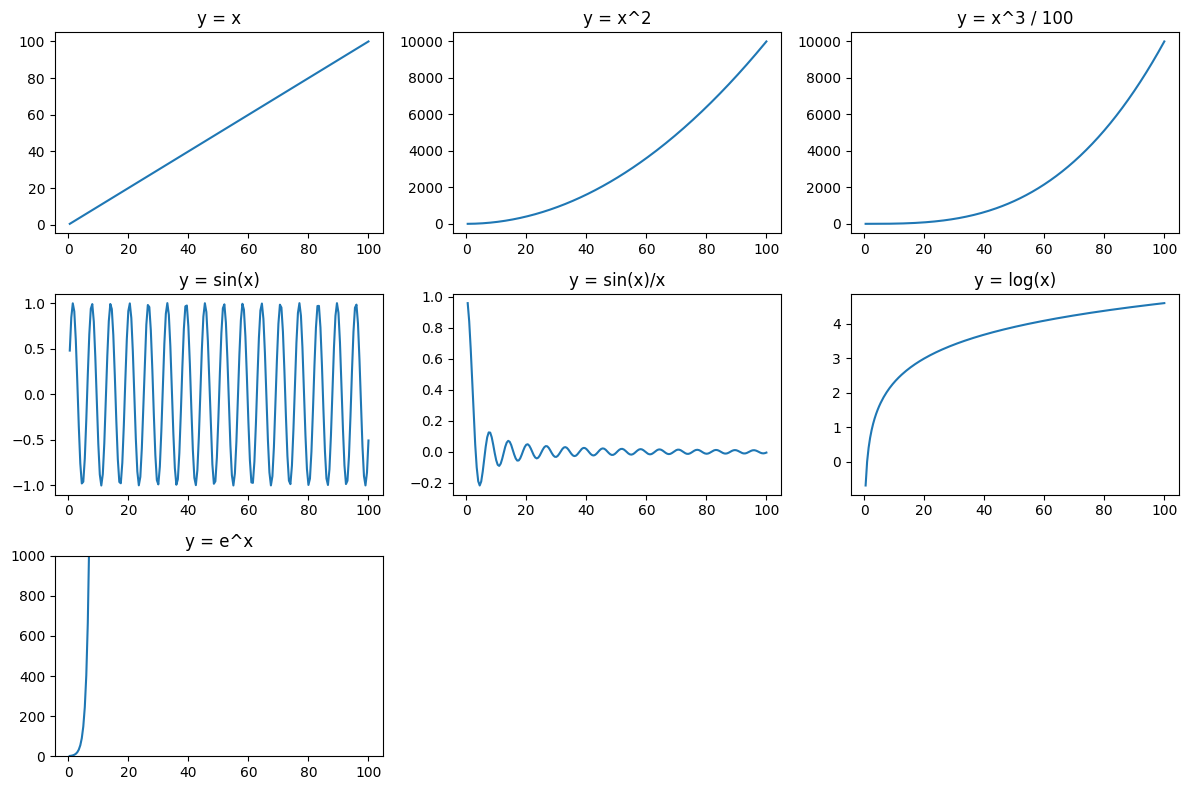

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
x = np.arange(0.5, 100.5, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)  # Will grow extremely large

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(x, y1)
plt.title("y = x")

plt.subplot(3, 3, 2)
plt.plot(x, y2)
plt.title("y = x^2")

plt.subplot(3, 3, 3)
plt.plot(x, y3)
plt.title("y = x^3 / 100")

plt.subplot(3, 3, 4)
plt.plot(x, y4)
plt.title("y = sin(x)")

plt.subplot(3, 3, 5)
plt.plot(x, y5)
plt.title("y = sin(x)/x")

plt.subplot(3, 3, 6)
plt.plot(x, y6)
plt.title("y = log(x)")

plt.subplot(3, 3, 7)
plt.plot(x, y7)
plt.title("y = e^x")
plt.ylim(0, 1000)  # Limit y to avoid overflow

plt.tight_layout()
plt.show()


Q10.Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [ ]:
import numpy as np
import pandas as pd

# Step 1: Generate 20x5 matrix with uniform random numbers from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Step 2: Create a DataFrame
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Step 3: Find column with highest standard deviation
col_with_max_std = df.std().idxmax()

# Step 4: Find row with lowest mean
row_with_min_mean = df.mean(axis=1).idxmin()

# Output results
print("DataFrame:")
print(df)
print("\nColumn with highest standard deviation:", col_with_max_std)
print("Row index with lowest mean:", row_with_min_mean)


DataFrame:
           a         b         c         d         e
0   1.650172  1.549202  1.754676  1.550333  1.216931
1   1.507194  1.123043  1.908536  1.387656  1.469116
2   1.196880  1.972685  1.979368  1.567548  1.028573
3   1.475094  1.855111  1.362040  1.929970  1.641097
4   1.883766  1.424658  1.812773  1.662374  1.292640
5   1.100775  1.079047  1.743971  1.554005  1.357602
6   1.032138  1.465606  1.824650  1.169938  1.636822
7   1.754643  1.707270  1.070833  1.777394  1.139178
8   1.721543  1.418510  1.824259  1.750745  1.859245
9   1.868155  1.807464  1.869146  1.525671  1.193335
10  1.107294  1.803250  1.398598  1.362163  1.346647
11  1.992250  1.870381  1.973292  1.315757  1.174773
12  1.354603  1.644528  1.709456  1.631574  1.697260
13  1.583818  1.190718  1.013924  1.886840  1.533160
14  1.771138  1.809067  1.760703  1.313418  1.315433
15  1.740076  1.174274  1.064654  1.234200  1.391703
16  1.803765  1.928742  1.038758  1.671464  1.024615
17  1.210288  1.827919  1.956415  1

Q11.Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Generate 20x5 matrix with uniform random numbers from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Step 2: Create a DataFrame
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Step 3: Find column with highest standard deviation
col_with_max_std = df.std().idxmax()

# Step 4: Find row with lowest mean
row_with_min_mean = df.mean(axis=1).idxmin()

# Step 5: Add new column 'f' = sum of a, b, c, d, e
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

# Step 6: Add column 'g' based on condition
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

# Step 7: Find number of rows where g = "LT8"
lt8_count = (df["g"] == "LT8").sum()

# Step 8: Find std deviation of 'f' for LT8 and GT8 separately
std_lt8 = df.loc[df["g"] == "LT8", "f"].std()
std_gt8 = df.loc[df["g"] == "GT8", "f"].std()

# Output
print("DataFrame:")
print(df)
print("\nColumn with highest standard deviation:", col_with_max_std)
print("Row index with lowest mean:", row_with_min_mean)
print("\nNumber of rows where g = 'LT8':", lt8_count)
print("Std deviation of 'f' for LT8:", std_lt8)
print("Std deviation of 'f' for GT8:", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.763289  1.950005  1.088093  1.579505  1.407810  7.788703  LT8
1   1.836269  1.387090  1.633408  1.769054  1.580241  8.206062  GT8
2   1.587594  1.790404  1.277333  1.977497  1.912731  8.545560  GT8
3   1.603699  1.818995  1.453412  1.535531  1.359099  7.770736  LT8
4   1.068359  1.289869  1.764571  1.977472  1.422580  7.522852  LT8
5   1.308252  1.899489  1.214297  1.797941  1.404933  7.624912  LT8
6   1.699720  1.732890  1.232484  1.003467  1.079973  6.748534  LT8
7   1.836468  1.698390  1.365836  1.876585  1.277159  8.054438  GT8
8   1.216748  1.103973  1.173868  1.475313  1.393394  6.363297  LT8
9   1.543093  1.320330  1.757009  1.054070  1.635505  7.310006  LT8
10  1.434505  1.890331  1.002525  1.707830  1.004118  7.039309  LT8
11  1.303038  1.948991  1.962476  1.298277  1.943909  8.456692  GT8
12  1.670008  1.114013  1.284188  1.290482  1.870609  7.229299  LT8
13  1.910502  1.680863  1.475020  1.9

Q12.Write a small piece of code to explain broadcasting in numpy.

In [ ]:
import numpy as np

# A 3x3 matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# A 1D array (length 3)
b = np.array([10, 20, 30])

# Broadcasting: b is added to each row of A
C = A + b

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)
print("\nResult after broadcasting (A + b):")
print(C)
print("NumPy broadcasting allows operations between arrays of different shapes without manually repeating data.")

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b:
[10 20 30]

Result after broadcasting (A + b):
[[11 22 33]
 [14 25 36]
 [17 28 39]]
NumPy broadcasting allows operations between arrays of different shapes without manually repeating data.


Q13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np

def my_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

# Example usage
arr = np.array([233,5,5,11,5,2,123,5])

# Our function result
custom_result = my_argmin(arr)

# NumPy's built-in result
numpy_result = np.argmin(arr)

print("Array:", arr)
print("Custom argmin index:", custom_result)
print("NumPy argmin index:", numpy_result)


Array: [233   5   5  11   5   2 123   5]
Custom argmin index: 5
NumPy argmin index: 5
